# Predictive Models

In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from Week 2
df = pd.read_csv('US_Accidents_June20_CLEAN_Week2.csv')
print('df.shape:', df.shape)

df.shape: (3454629, 161)


In [3]:
#Display features
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump',
       ...
       'Wind_Direction_SE', 'Wind_Direction_SSE', 'Wind_Direction_SSW',
       'Wind_Direction_SW', 'Wind_Direction_VAR', 'Wind_Direction_W',
       'Wind_Direction_WNW', 'Wind_Direction_WSW', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night'],
      dtype='object', length=161)

Models and performance indicators:<br>
* Since the predicted values can be 1,2,3 or 4, I'll tackle the problem as a multiclass classification problem. For that reason, I'll first define a baseline prediction performance with a <b>linear SVM</b>.
* Next, other models will be assessed: <b>Decision Trees</b>, <b>Random Forest</b> and a simple <b>Fully Connected Deep Neural Network</b>.
* In order to assess the performance of the different models, the accuracy of the model will be regarded and the cofusion matrix for each model will be inspected.
* Additionally, the Feature Importance of each model will be displayed for better model understanding.

# Sample to deal with class imbalance

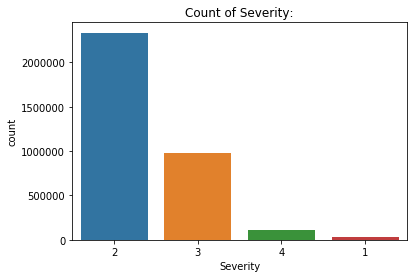

In [4]:
# plot severity of data to see how imbalance the data is

fig, ax = plt.subplots()
sns.countplot('Severity',data=df,ax=ax,order=df['Severity'].value_counts().index)
ax.set_title('Count of Severity:')
plt.show()

There is a big class imbalance. In order to deal with it, I'll undersample classes 2, 3 and 4 and oversample class 1.

In [5]:
for i in range (4):
    print('Severity level {}:'.format(i+1), df.loc[df['Severity']==i+1].shape[0])

Severity level 1: 28673
Severity level 2: 2333784
Severity level 3: 982355
Severity level 4: 109817


In [6]:
#define random state for replicability
my_random_state = 4
#take 50000 datapoints of each severity in order for the data to be balanced.
df_sampled = pd.concat([df[df['Severity']==1].sample(50000, replace = True, random_state=my_random_state),
                        df[df['Severity']==2].sample(50000, random_state=my_random_state),
                        df[df['Severity']==3].sample(50000, random_state=my_random_state),
                       df[df['Severity']==4].sample(50000, random_state=my_random_state)],
                       axis=0)

df_sampled

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,...,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Sunrise_Sunset_Day,Sunrise_Sunset_Night
2829025,1,41.471470,-81.882360,41.0,73.0,29.24,10.0,17.0,False,False,...,0,0,0,0,0,0,0,0,1,0
2734886,1,36.045740,-86.674400,73.0,59.0,29.12,10.0,7.0,False,False,...,0,0,0,0,0,1,0,0,1,0
2890034,1,47.546500,-122.376410,60.0,55.0,30.17,10.0,0.0,False,False,...,0,0,0,0,0,0,0,0,1,0
2824945,1,37.363710,-121.898190,56.0,84.0,29.95,9.0,0.0,False,False,...,0,0,0,0,0,0,0,0,1,0
2860343,1,28.300760,-81.575290,72.0,97.0,29.78,10.0,6.0,False,False,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365561,4,39.589046,-78.838606,62.6,88.0,30.12,10.0,7.0,False,False,...,0,0,0,0,0,0,0,0,0,1
2498312,4,39.602577,-76.998620,37.4,70.0,30.26,10.0,7.0,False,False,...,0,0,0,0,0,0,0,0,0,1
2482000,4,43.957079,-70.561316,32.0,48.0,30.18,10.0,15.0,False,False,...,0,0,0,0,0,0,0,0,0,1
2596260,4,30.236345,-93.219636,59.0,100.0,29.99,10.0,8.1,False,False,...,0,0,0,0,0,0,0,0,0,1


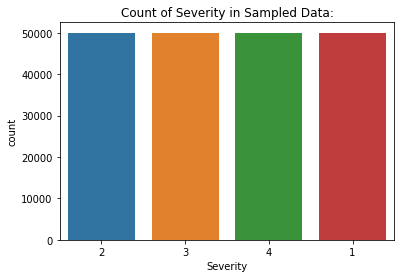

In [7]:
#Plot sampled data

fig, ax = plt.subplots()
sns.countplot('Severity',data=df_sampled,ax=ax,order=df['Severity'].value_counts().index)
ax.set_title('Count of Severity in Sampled Data:')
plt.show()

# Train Test Split

In [8]:
# split X, y
X = df_sampled.drop('Severity', axis=1)
y = df_sampled['Severity']

# Standardizing the features based on unit variance

X = StandardScaler().fit_transform(X)

# split train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=my_random_state) #my_random_state is defined in the cell above!

# Algorithms

In [9]:
#First look the number of datapoints in order to define the maximum iterations that will be allowed

n_datapoints = df_sampled.shape[0]
df_sampled.shape

(200000, 161)

## Linear Support Vector Machine (Baseline performance)

In [10]:
# Support Vector Machine

lin_clf = svm.LinearSVC(verbose=2)
lin_clf.fit(X_train, y_train)

[LibLinear]

/Users/pedro.roig.aparicio@ibm.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=2)

In [11]:
#Print Accuracy of the model
print('Linear SVM Accuracy:')
print('*'*20)
accuracy_train_lin = lin_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train_lin*100))
accuracy_test_lin = lin_clf.score(X_test, y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test_lin*100))

Linear SVM Accuracy:
********************
Train Accuracy: 66.1%
Test Accuracy: 65.7%


array([[[20506,  2028],
        [  356,  7110]]])

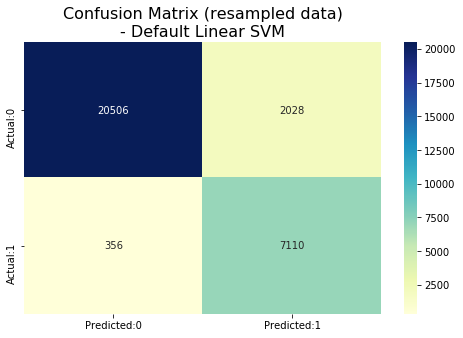

In [12]:
y_pred = lin_clf.predict(X_test)

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1])
display(confmat)

conf_matrix = pd.DataFrame(data=confmat[0], columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu").set_title("Confusion Matrix (resampled data)\n- Default Linear SVM", fontsize=16)
plt.show()

As expected, the baseline model performs pretty poorly. It wasn't even able to converge. This of course happens due to the fact that the data is not linearly separable Eventhough, a <b>Test Accuracy</b> of <b>65.6%</b> is not bad, since randomly 25% accuracy would be achieved.

## Decision Tree

Now I'll try out a Decision Tree.

In [13]:
DT_grid = { 'min_samples_split': [10,20,30,40,50],'max_features': [None, 'log2', 'sqrt']}

CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=my_random_state), DT_grid, verbose=2, cv=3) #my_random_state is defined in a cell above!

CV_DT.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=None, min_samples_split=10 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... max_features=None, min_samples_split=10, total=   5.6s
[CV] max_features=None, min_samples_split=10 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] .......... max_features=None, min_samples_split=10, total=   5.9s
[CV] max_features=None, min_samples_split=10 .........................
[CV] .......... max_features=None, min_samples_split=10, total=   5.2s
[CV] max_features=None, min_samples_split=20 .........................
[CV] .......... max_features=None, min_samples_split=20, total=   5.4s
[CV] max_features=None, min_samples_split=20 .........................
[CV] .......... max_features=None, min_samples_split=20, total=   4.9s
[CV] max_features=None, min_samples_split=20 .........................
[CV] .......... max_features=None, min_samples_split=20, total=   5.1s
[CV] max_features=None, min_samples_split=30 .........................
[CV] .......... max_features=None, min_samples_split=30, total=   4.9s
[CV] max_features=None, min_samples_split=30 .........................
[CV] .......... max_features=None, min_samples_split=30, total=   4.7s
[CV] max_features=None, min_samples_split=30 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=4, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_split': [10, 20, 30, 40,

In [14]:
print('Best Parameters: ', CV_DT.best_params_)

Best Parameters:  {'max_features': None, 'min_samples_split': 50}


In [15]:
#Use best parameters to check Test Accuracy
tree_clf = DecisionTreeClassifier(min_samples_split = CV_DT.best_params_['min_samples_split'])
tree_clf = tree_clf.fit(X_train,y_train)

#Print Train and Test Accuracy
tree_accuracy_train = tree_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = tree_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

Train Accuracy: 80.4%
Test Accuracy: 70.3%


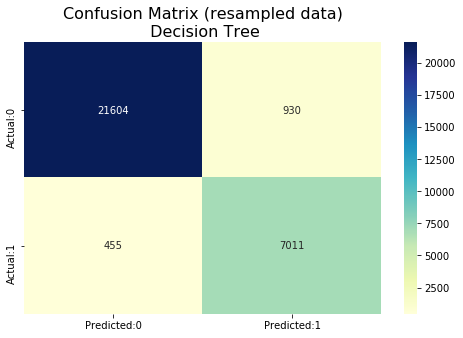

In [16]:
# Confusion Matrix
prediction = tree_clf.predict(X_test)

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=prediction)

conf_matrix = pd.DataFrame(data=confmat[0],columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Confusion Matrix (resampled data)\n Decision Tree", fontsize=16)
plt.show()

There is a big gap between Train and Test Accuracy. When the model performs good predicting in the training set and underperforms when predicting in the test set, we call it <b>overfitting the training set</b>. This can be dealt with by regularizing, so the next I'll try is <b>Random Forest</b>-model, which is a 'regularized version' of the decision tree.

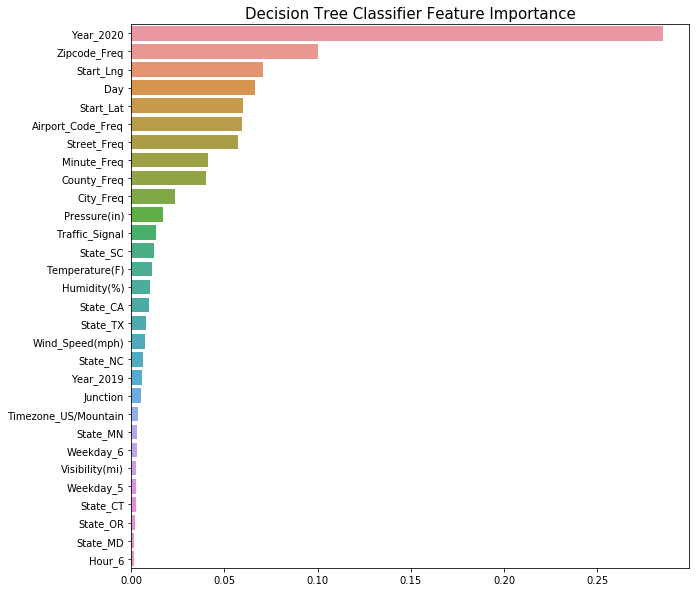

In [17]:
#Feature importance

importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity',axis=1).columns)

importances.iloc[:,0] = tree_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Decision Tree Classifier Feature Importance', size=15)

plt.show()

## Random Forest

A Random Forest are many Decision Trees initialized at random and mergeded with their corresponding weight. Like that, one could say Random Forest gets rid of the overfit a Decision Tree could have.

In [18]:
param_grid = { 
    'n_estimators'     : [30,40,50],
    'max_depth'        : [20,30,40]
}
CV_clf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,cv=4,verbose=2)
CV_clf.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] max_depth=20, n_estimators=30 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=20, n_estimators=30, total= 1.5min
[CV] max_depth=20, n_estimators=30 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] .................... max_depth=20, n_estimators=30, total= 1.4min
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .................... max_depth=20, n_estimators=30, total= 1.4min
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .................... max_depth=20, n_estimators=30, total= 1.5min
[CV] max_depth=20, n_estimators=40 ...................................
[CV] .................... max_depth=20, n_estimators=40, total= 2.0min
[CV] max_depth=20, n_estimators=40 ...................................
[CV] .................... max_depth=20, n_estimators=40, total= 1.9min
[CV] max_depth=20, n_estimators=40 ...................................
[CV] .................... max_depth=20, n_estimators=40, total= 1.9min
[CV] max_depth=20, n_estimators=40 ...................................
[CV] .................... max_depth=20, n_estimators=40, total= 1.9min
[CV] max_depth=20, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 76.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [19]:
print('Best Parameters: ', CV_clf.best_params_)

Best Parameters:  {'max_depth': 40, 'n_estimators': 50}


In [20]:
rf_clf = RandomForestRegressor(max_depth=CV_clf.best_params_['max_depth'],n_estimators=CV_clf.best_params_['n_estimators'])
rf_clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
rf_accuracy_train = rf_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (rf_accuracy_train*100))
rf_accuracy_test = rf_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (rf_accuracy_test*100))

Train Accuracy: 95.9%
Test Accuracy: 71.8%


The performance of the Random Forest is better than the Decision Tree, but the model is still overfitting. Note that this model was training over 1 hour, so the extra time was not worth the improvement in accuracy.

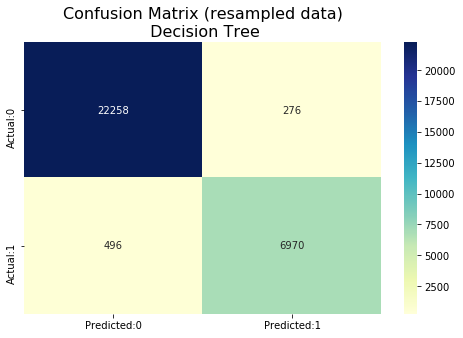

In [22]:
# Confusion Matrix
prediction = np.round(rf_clf.predict(X_test))

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=prediction)

conf_matrix = pd.DataFrame(data=confmat[0],columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title("Confusion Matrix (resampled data)\n Decision Tree", fontsize=16)
plt.show()

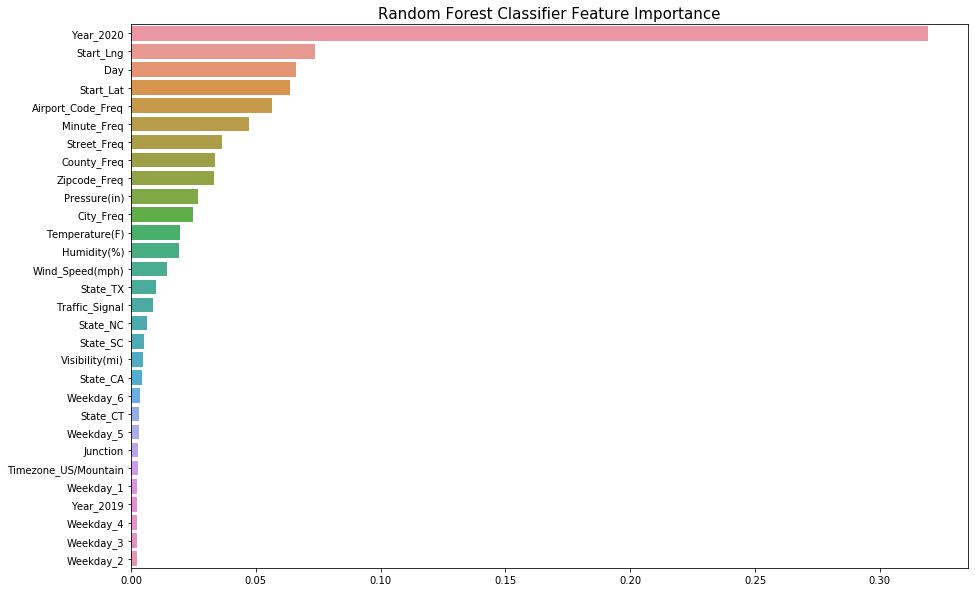

In [23]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity',axis=1).columns)

importances.iloc[:,0] = rf_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

It is weird that the most important feature to predict severity is the one-hot encoding of 'Year_2020'. This means that in 2020 the accidents have become very characteristic. Also, I'd like to point out the importance of Start_Lat and Start_Lng, since that means that location has a big importance for prediction.

## Neural Network

For the NN to work, I need to first one-hot encode the y-labels!

In [24]:
# One-hot encode the 4 severity levels!
y_train_encoded = pd.get_dummies(y_train, drop_first=False)
y_test_encoded = pd.get_dummies(y_test, drop_first=False)

In [31]:
# Define the keras model

model = Sequential()
model.add(Dense(100, input_dim=160, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [32]:
# Compile the keras model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Fit the keras model on the dataset

model.fit(X_train, y_train_encoded, epochs=150, batch_size=32)

Epoch 1/150
5313/5313 [==============================] - 5s 982us/step - loss: 0.7966 - accuracy: 0.6756
Epoch 2/150
5313/5313 [==============================] - 5s 897us/step - loss: 0.7334 - accuracy: 0.7027
Epoch 3/150
5313/5313 [==============================] - 5s 882us/step - loss: 0.7107 - accuracy: 0.7126
Epoch 4/150
5313/5313 [==============================] - 5s 879us/step - loss: 0.6935 - accuracy: 0.7191
Epoch 5/150
5313/5313 [==============================] - 5s 859us/step - loss: 0.6797 - accuracy: 0.7237
Epoch 6/150
5313/5313 [==============================] - 4s 846us/step - loss: 0.6682 - accuracy: 0.7292
Epoch 7/150
5313/5313 [==============================] - 5s 862us/step - loss: 0.6585 - accuracy: 0.7330
Epoch 8/150
5313/5313 [==============================] - 5s 850us/step - loss: 0.6493 - accuracy: 0.7359
Epoch 9/150
5313/5313 [==============================] - 5s 892us/step - loss: 0.6416 - accuracy: 0.7392
Epoch 10/150
5313/5313 [==============================]

In [34]:
# Evaluate the keras model

_, accuracy_nn_train = model.evaluate(X_train, y_train_encoded)
print('Accuracy: %.2f' % (accuracy_nn_train*100))

_, accuracy_nn_test = model.evaluate(X_test, y_test_encoded)
print('Accuracy: %.2f' % (accuracy_nn_test*100))

5313/5313 [==============================] - 3s 580us/step - loss: 0.4752 - accuracy: 0.8021
Accuracy: 80.21
938/938 [==============================] - 1s 612us/step - loss: 0.9742 - accuracy: 0.6960
Accuracy: 69.60


The accuracy of the DL model is not as good as expected. THe model is also really basic with just 2 fully connected layers. With some hyperparameter tunning I'm pretty sure the accuracy could go up.

## Summary table

In [53]:
df_summary = pd.DataFrame(columns=['Model', 'Train_Accuracy[%]', 'Test_Accuracy[%]'])

In [56]:
df_summary.Model = ['Linear SVM', 'Decision Tree', 'Random Forest', 'Neural Network']
df_summary['Train_Accuracy[%]'] = ['66.1', ' 80.4', '95.9', '80.21']
df_summary['Test_Accuracy[%]'] = ['65.7', '70.3', '71.8', '69.6']

In [57]:
df_summary

,Model,Train_Accuracy[%],Test_Accuracy[%]
0,Linear SVM,66.1,65.7
1,Decision Tree,80.4,70.3
2,Random Forest,95.9,71.8
3,Neural Network,80.21,69.6
